# Birthday paradox

**Problem 1a.** During exercise session, we showed that for $d$ equally likely dates in a year and $n$ people, the probability of a repeat date is $p(n)=1-\frac{d^\underline{n}}{d^n}$. We also derived a simple approximate formula for this probability: $p_a(n) = 1-e^{-\frac{n(n-1)}{2d}}$. In particular, this approximation implies that for $d=365$ dates, $p(n)$ is close to $\frac{1}{2}$ for $n=23$.

Verify how good the approximation is. To this end, write a program that computes the exact value of $p(n)$ as well as the value of the approximation $p_a(n)$ for $d=365$ and $n=1,\ldots,60$. Plot the graphs of the two functions.

0.994122660865348
0.992166258711656


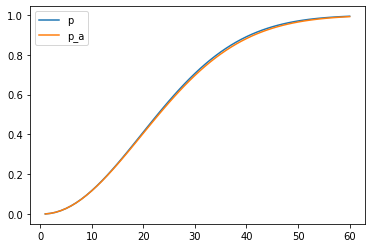

In [11]:
import math
import matplotlib.pyplot as plt

n = 60
d = 365

def propability(d, n):

    p_n = 1
    d_n = d

    for i in range(n):
        p_n = p_n * d_n / d
        d_n -= 1

    p_n = 1 - p_n

    return p_n
   
print(propability(d, n))

def approximate(d, n):

    e = math.exp(1)
   
    x = (-1) * (n * (n - 1) / (2 * d))
   
    pan = 1 - math.exp(x)
   
    return pan

print(approximate(d, n))


x = range(1, n+1)
y = [propability(d, n) for n in x]
y_a = [approximate(d, n) for n in x]

plt.plot(x, y, label = "p")
plt.plot(x, y_a, label = "p_a")
plt.legend()
plt.show()

**Problem 1b.**
Implement a function, that chooses random dates out of $1,\ldots,d$ until a repeat occurs. The function should return the number of the step in which that happened. Run the function $N=100\,000$ times. 
    * Plot a histogram of the return values.
    * Which return value seems most likely? 
    * What is the average of the return values?
    * Is there any simple relation between these two numbers and the value $23$ in the previous problem?
    * Is there any simple relation between the histogram obtained, and the plot in the previous problem?

14


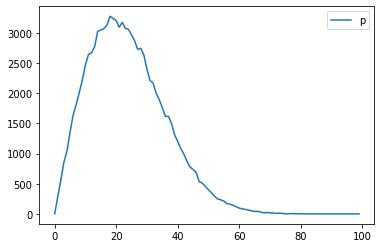

In [58]:
import random
import matplotlib.pyplot as plt

N = 100000

def random_dates(n, d):
   
    date = 1
    list = []
   
    for step in range(n):
       
        date = random.randint(1, d)
       
        if list.count(date) > 0:
            return step
        else:
            list.append(date)

print(random_dates(N, 365))  

n = 100000
d = 365

x = range(1, n+1)
y = [random_dates(N, d) for n in x]
z = []
pomoc = 0

for i in range(n):
    
    if (y[i] + 1) > len(z):
        pomoc = (y[i] + 1) - len(z)
        for j in range(pomoc):
            z.append(0)
    
    pomoc = z[y[i]]
    z[y[i]] = pomoc + 1
# z.append(0)    
x_2 = range(0, len(z))
    

plt.plot(x_2, z, label = "p")
plt.legend()
plt.show()

**Problem 1c.** Here we investigate how our analysis using the classical approach compares to a more empirical one. The file *us_births_69_88.csv* contains the counts for birthdates from 1969 to 1988. Only those births, for which the full date is known, are included in the file.
    * Read the file.
    * Investigate the data. Do you notice anything strange?
    * Plot a heatmap of the data. Do you notice any significant deviations from the uniform assumption? Can you explain them?
    * Implement a sampling function as in 1b, but this time using the supplied data. Compare the results.

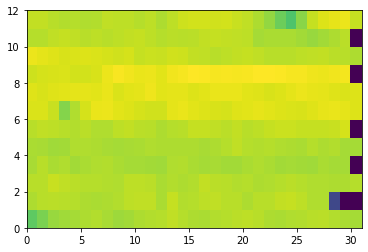

In [13]:
import numpy as np
import matplotlib.pyplot as plt


stats = np.loadtxt("us_births_69_88.csv", delimiter = ",", skiprows = 1, dtype = int)

# print(stats[1][2])

def getHeatmap(stats):
   
    heatMap = np.zeros((12, 31))
    month = 0
    day = 0
    value = 0
   
    for step in range(len(stats)):
       
        month = stats[step][0]
        day = stats[step][1]
        value = stats[step][2]
       
        heatMap[month - 1][day - 1] = value
       
    return heatMap

heatMap = getHeatmap(stats)

plt.pcolor(heatMap)




# def drawGraph(stats):

# print(stats.shape)

# p = np.random.randint(1, 10, [10,10])
# print(p)
# plt.pcolor(p)


# npArray = np.array([1, 2, 3, 4])
# type(1)

# list = [1,2,3,4]

# print(list * 5)
# print(nparray * 5)


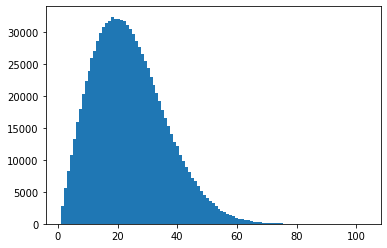

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from bisect import bisect_left
import random

stats = np.loadtxt("us_births_69_88.csv", delimiter = ",", skiprows = 1, dtype = int)

def getValueSumArray(stats):
   
    valueSum = 0
    value = 0
    valueSumArray = np.empty(len(stats), dtype=int)
   
    for step in range(len(stats)):
       
        value = stats[step][2]
       
        if step == 0:
            valueSumArray[step] = value
        else:
            valueSumArray[step] = valueSumArray[step - 1] + value

    return valueSumArray

# getIndexOfSmallestBiggerOrEqualUsingBinarySearch
def binarySearch(array, value): 
    
    return bisect_left(array, value)

def getStepInWchichRepeatHappens(days, valueSumArray):
   
    date = 0
    list = []
    randomValue = 0
   
    for step in range(days + 1):
       
        randomValue = random.randint(1, valueSumArray[len(valueSumArray) - 1])
        
        date = binarySearch(valueSumArray, randomValue)
       
        if list.count(date) > 0:
            return step
        else:
            list.append(date)
            

valueSumArray = getValueSumArray(stats)

arrayOfSteps = []
Number = 100000

for step in range(Number):
    arrayOfSteps.append(getStepInWchichRepeatHappens(len(valueSumArray), valueSumArray))

    

plt.hist(arrayOfSteps, bins = max(arrayOfSteps))
plt.show()

